# Project 2 : Visualization

## Instructions

### Description

In this project, you will look at three bad visualizations then:

1. Identify what makes them bad
1. Use the same data to make a better chart
1. Explain an interesting pattern you noticed.

Some helpful questions to determine if a visualization is bad:

1. What is the visualization trying to show? Ex. Comparison? Relationship? Change over time?
2. Is this the right visualization to use?
3. Does the visualization have the correct labels and axes limits?
4. Is there too much being shown in one visualization? Should it be split?

Some helpful questions to find patterns in a visualization:

1. How do different data points compare? Are there significant differences? Are there any outliers?
2. If comparing data/series, how do they rank? Is there a significant difference between rankings?
3. If looking at data over time, is there any seasonality? How do the values compare to the mean and/or median? How do the values change over time? Ex. Ups and downs? Always up? Always down?

### Getting Started

The lecture on data visualization (available in the usual places) has a lot of code examples.  Also don't forget the matplotlib documentation available from the Help menu in the notebook.

Also, this is the first assignment we've given where we ask you to provide text answers and not just code. You don't have to get fancy, but you'll want to use Markdown to write up your answers.  There is Markdown help available from the Help menu as well.

### Grading

For grading purposes, we will clear all outputs from all your cells and then run them all from the top.  Please test your notebook in the same fashion before turning it in.

### Submitting Your Solution

To submit your notebook, first clear all the cells (this won't matter too much this time, but for larger data sets in the future, it will make the file smaller).  Then use the File->Download As->Notebook to obtain the notebook file.  Finally, submit the notebook file on Canvas.

### Credits

Many thanks to Saad Elbeleidy for this assignment!

### Setup Code

In [1]:
## Imports
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Problem 1: Bad line chart (15 points)

To get you started, we'll walk through 1 bad visualization.

![Bad Line Chart](http://imgur.com/kB6uNZC.png)

In [2]:
# Bad line chart data & names
badLineNames = ["2016 Q1", "2016 Q2", "2016 Q3", "2016 Q4"]
badLineProduct1 = [240, 300, 280, 400]
badLineProduct2 = [300, 320, 150, 160]
badLineProduct3 = [120, 140, 180, 160]
badLineProduct4 = [380, 400, 450, 500]

**What makes this visualization bad?**

**1. What is the visualization trying to show? Ex. Comparison? Relationship? Change over time?**

This visualization trys to show data over time.

**2. Is this the right visualization to use?**

Yes, we should be using a line chart to show data over time.

**3. Does the visualization have the correct labels and axes limits?**

There are no labels or a title. We could also use some more space between the min and maximum data points and the axes limits.

**4. Is there too much being shown in one visualization? Should it be split?**

Yes, it's quite difficult to follow each series, it should be split.


Since the chart type is the correct one, it seems all we need to do is add labels and split the lines into panels. Before we do that, we can probably also improve the design. We covered how to improve a `matplotlib` plot in class using different styles. Select a `style` and apply it below.

In [3]:
## Apply your chosen style here
plt.style.use('bmh') 
#I tried multiple styles from the "avaiable list", but not all of them worked are there other modules that need loaded?

example of how to set up subplots can be found in lecture 05, slide 13. 

Now we need to plot the data over different panels. We can use [`plt.subplots`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots) to create multiple panels. Since we have 4 products, we're going to need 4 panels on top of each other. `subplots` returns two variables, the figure object and an array of axes. What we can do is loop through each Axes object and create a plot for that product. The first Axes object should plot the first product, the second should plot the second product and so on.
<br><br>
**Step 1: Buffers** 
<br>Each subplot will have its own y axis, but to make the scale is the same for all subplots, create a buffer between the lowest value among all products and the start of the y axis as well as between the highest value and the top of the y axis. These buffers are simply integers that extend the y axis above the highest value in the products, and below the lowest.
<br><br>
**Step 2: Mean**
<br>Calculate the mean of the entire data set -- the mean of the individual product means. To calculate this easily, first put the products in a list, create a list of the individual means using a comprehension over the product list, then find the mean of the list of individual means.
<br><br>
**Step 3: Colors**
<br>Choose a color for the plot of each product. This can be done by filling a list with each color's matplotlib name. Available colors can be found [here](https://matplotlib.org/2.0.2/api/colors_api.html)
<br><br>
**Step 4: Subplots** 
<br>Now that those numbers are calculated, create 4 line charts on top of each other, each plotting one of the products.
<br>For each subplot:
<br>
1) plot the product with `plot(data, color)`
<br>
2) Set the y scale using `set_ylim(bottomBuffer, topBuffer)`
<br>
3) Add an x label if this panel is not the bottom one using `set_xticklabels(list of labels)`
<br>
4) Add a title to the subplot with the product number using `set_title(title)`
<br>
5) Add a dashed line with the value of the mean using `plot(mean, args)` or `axhline(mean, args)`. More info [here](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axhline.html)
<br><br>
**Step 5: Beautify**
<br>
1) Add a title to the whole diagram(the superplot) with `fig.suptitle(title)`
<br>
2) Rearrange subplots, if necessary, with `fig.subplots_adjust(left, bottom, right, top, wspace, hspace)`
<br><br>
**Notes:**
<br>
- Many of the arguments to many of these functions are 'default', meaning they're optional. If there's an argument you don't need or want, try leaving it out. For example, if you only want to change the hspace of the subplots, you can call `fig.subplot_adjust(hspace=0.6)` without specifying the other arguments. Just be sure to label the argument you want to specify. Don't just write `fig.subplot_adjust(0.6)`

/tmp/ipykernel_4017172/3806437077.py:59: UserWarning: The label '_1' of <matplotlib.lines.Line2D object at 0x7fb0d6c551c0> starts with '_'. It is thus excluded from the legend.
  fig.legend(['_1','Avg. Sales 2016'], loc='lower center', bbox_to_anchor=(0.5, 0.04))


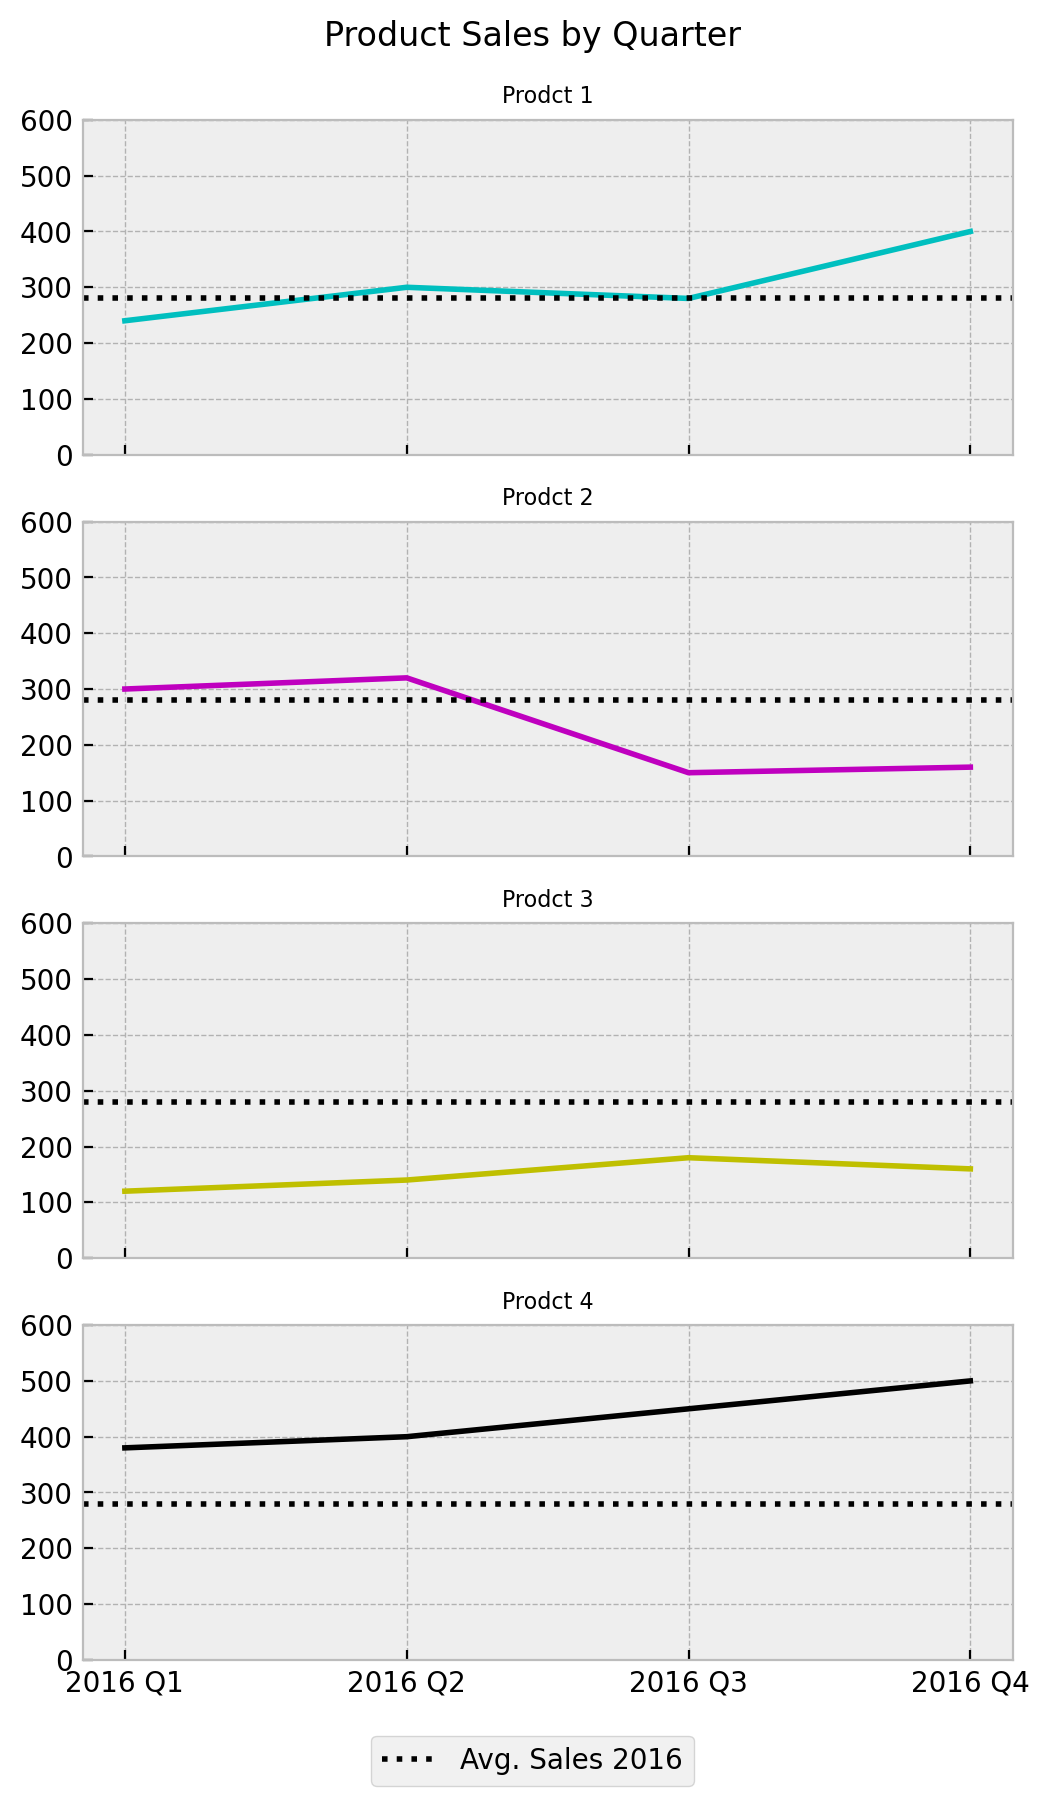

In [4]:
#Just making the data easier for me to work with
xs=[badLineNames]
ys=[badLineProduct1, badLineProduct2, badLineProduct3, badLineProduct4]

# Step 1 Buffers
topbuffer=100
botbuffer=-100 #didn't end up using this, I thought a zero value looked better visually
minY = min(min(ys[0]),min(ys[1]),min(ys[2]),min(ys[3]))
maxY = max(max(ys[0]),max(ys[1]),max(ys[2]),max(ys[3]))

# Step 2 Mean

import statistics

meanList = [statistics.mean(lst) for lst in ys]
meanAll = statistics.mean(meanList)

# Step 3 Colors

pltclrs=["c","m","y","k"]

# Step 4 Subplots

fig, pltAxes = plt.subplots(ncols=1, nrows=4, figsize=(6, 10), gridspec_kw={'height_ratios': [1, 1, 1, 1]})
#I had to do some fiddling above to get the charts not to be all smashed together

axes=pltAxes.ravel()
#I looked up explanations of ravel... I only half understand it. it seems to take ALL the indivudal array data and put 
#it into 1 array... is that necessary, could I have done this a better way?

endloop = len(axes)-1 #used to find the bottom most chart

for i, ax in enumerate(axes):
    # 1) plot the product with plot(data, color)
    ax.plot(xs[0],ys[i],pltclrs[i])              # Plot the x and y values and color
    
    # 2) Set the y scale using set_ylim(bottomBuffer, topBuffer) 
    ax.set_ylim(minY-minY, maxY + topbuffer)          #Visually, to me, the chart going to 0 looked better
    
    # 3) Add an x label if this panel is not the bottom one using set_xticklabels(list of labels)
    ax.set_xticklabels([]) #remove the x axis labels from each chart
    axes[endloop].set_xticks([0,1,2,3]) #indicates label postiions
    axes[endloop].set_xticklabels(badLineNames) #add the tick labels back to the bottom most chart
    
    # 4) Add a title to the subplot with the product number using set_title(title)
    ax.set_title(f"Prodct {i+1}", fontsize=8)   # Add the title for the dataset
   
    # 5) Add a dashed line with the value of the mean using plot(mean, args) or axhline(mean, args)
    ax.axhline(y=meanAll,  linestyle=":", color="k", label='Mean of All Sales') 
    
    
# Step 5 Beautify

# 1) Add a title to the whole diagram(the superplot) with fig.suptitle(title)
fig.suptitle("Product Sales by Quarter", y=0.93)

# 2) Rearrange subplots, if necessary, with fig.subplots_adjust(left, bottom, right, top, wspace, hspace)
#I didn't think this was needed as I did it earlier in step four
fig.legend(['_1','Avg. Sales 2016'], loc='lower center', bbox_to_anchor=(0.5, 0.04)) 
#add a legend so that people know what that dashed line means, exclude the main lines, as graph subtitles should explain



plt.show()


Now that you've created a better plot, try to describe a pattern in the dataset. Use the following questions as a reference:

1. How do different data points compare? Are there significant differences? Are there any outliers?
2. If comparing data/series, how do they rank? Is there a significant difference between rankings?
3. If looking at data over time, is there any seasonality? How do the values compare to the mean and/or median? How do the values change over time? Ex. Ups and downs? Always up? Always down?

<font color = blue>**Your Answer Here:**

We can see right off the bat that Product 4 is the best performing product, above the average throughout the year, with sales improving as the year progress. While Product 3 shows under performance throughout the entire year. Product 2 has a strong start of the year, but sales drop off in the second half, and Product 1 is fairly consistent through the year, with a nice spike at the end of the year. Product 4 carries us through Q3, which is good considering the drop in Product 2. 

Overall our Products rank in order: 4, 1, 2, 3
</font>
    

Next, look through the following bad visualizations and apply the above workflow to:

1. Determine what makes them bad
1. Create a better visualization
1. Describe a pattern in the data

### Problem 2: Bad pie chart (20 points)

Explain why this visualization is a bad one:

![Bad Pie Chart](http://imgur.com/Wg9DOZd.png)

<font color = blue>**Your Answer Here:**

What is even going on with this data? Are we comparing maybe the population of CO based on city, number of breweries, crime? Likely none, as these 4 cities do not make up the entirety of anything that is CO. So, it makes no sense to compare them in a pie chart. Plus, looking at the data below, those values do not even add to 100, so they are not percentages... no titles to give me any information about what we are looking at.

More likely, we are looking at the percent of a population in each of these cities that does "X". "X" being something like, owns a dog, rides a bike, drinks beer, etc...

A bar (or column) chart would probably be a better comparison.</font>

In [5]:
badPieNames = ["Golden", "Boulder", "Denver", "Colo Springs"]
badPieValues = [0.37, 0.4, 0.5, 0.35]

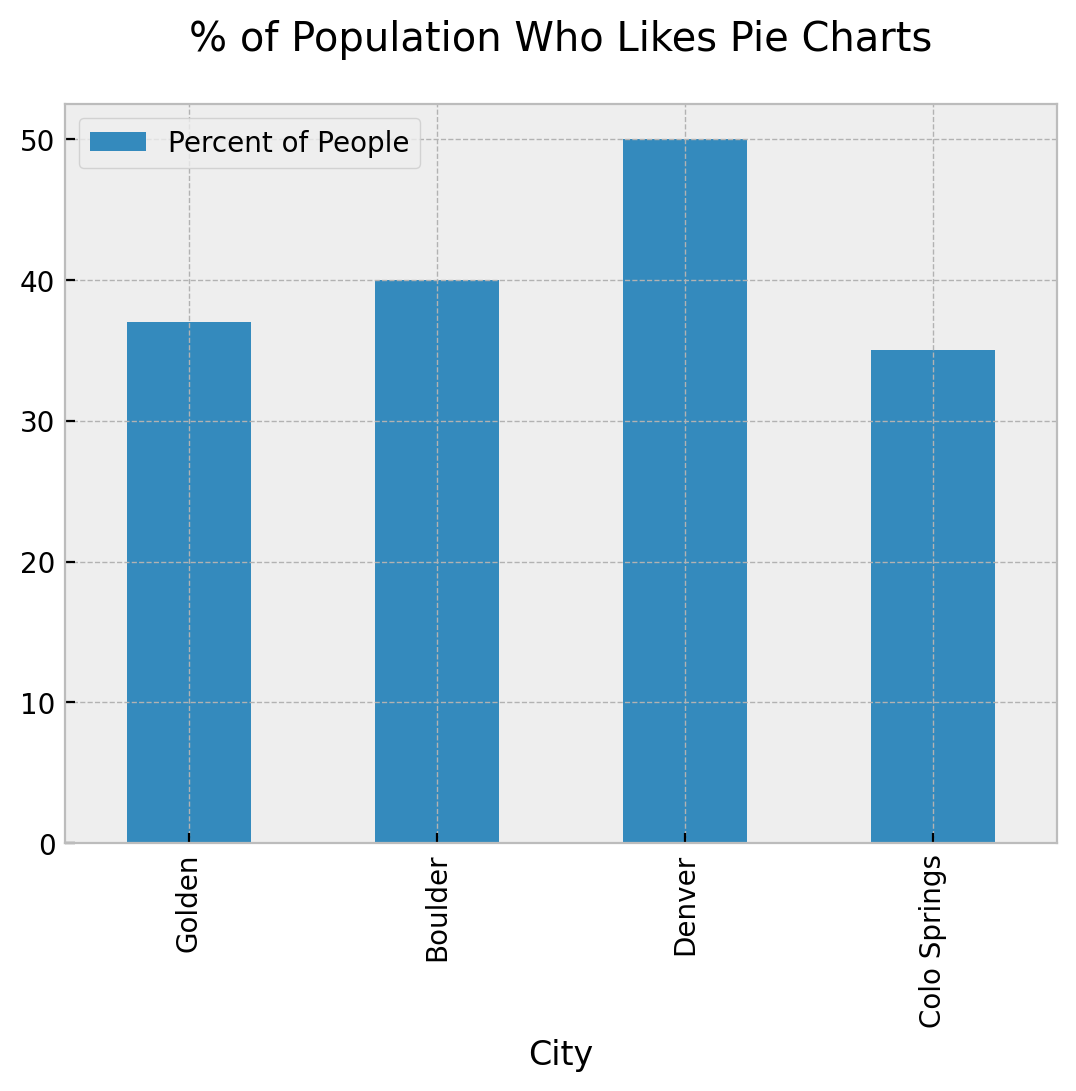

In [6]:
# Plot a better chart using this data... I stuck with column, b/c it was only 4 items

betterPieValues = [x * 100 for x in badPieValues] #turned the values in to %'s
badIdeas = pd.DataFrame({"City": badPieNames, "Percent of People": betterPieValues}) #compile the data for easy reference

badIdeas[["City", "Percent of People"]].plot(kind="bar", x="City",legend=True) # code to create a bar graph
plt.title("% of Population Who Likes Pie Charts", y=1.05) #moved the title up b/c it was too close
plt.show()

Tell a story or describe a pattern using your new visualization.

<font color = blue>**Your Answer Here:**

A survey was conducted on a few Colorado towns to determine how popular pie charts are. Based on the survey results we can see what percentage of each town have bad judgement- I mean, what percentage of each town likes pie charts. We can see here that Denver has the highest percent of people's who opinions you should not trust, as half the population thinks pie charts are a good idea.</font>

### Problem 3: Bad bar chart 1 (20 points)

Explain why this visualization is a bad one:

![Bad Bar Chart](http://imgur.com/AkLyM9I.png)

<font color = blue>**Your Answer Here:**

The use of the column chart is not bad, if we are trying to compare three different, but related items. But, we do not know if that is the case, because there are not chart or axes titles or legend. This leads into, is the y axis too zoomed in? Depends on what we are comparing, if the difference from 240 to 242 to 251 is significant then maybe not. But, maybe all these values are relatively the same in their real context; note the data below says 232 and not 242.</font>

In [7]:
badBarNames = ["A", "B", "C"]
badBarValues = [240, 232, 251]

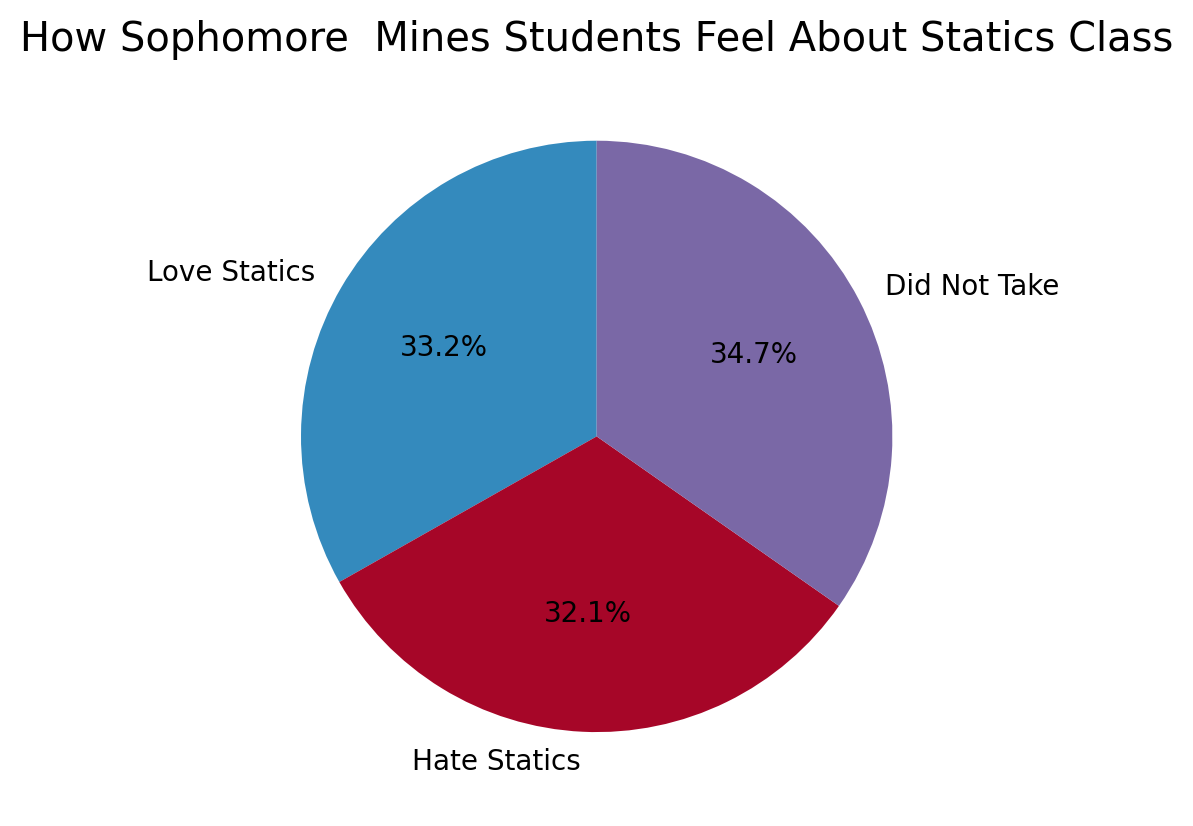

In [8]:
# Plot a better chart using this data

labels = ["Love Statics", "Hate Statics", "Did Not Take"] #make new lables, b/c A,B,C means nothing to me

plt.pie(badBarValues, labels=labels, autopct='%1.1f%%', startangle=90) 
#a pie chart, because the story I made up works for it and I thought it was funny

plt.title('How Sophomore  Mines Students Feel About Statics Class')

plt.show()


Tell a story or describe a pattern using your new visualization.

<font color = blue>**Your Answer Here:**

All Sophomore CSM Students were required to respond anonymously to a survey on how they felt about their Statics Course. Students were only given two options in terms of feelings, and were only exempt from answer if they did not take Statics. The survey (somehow) knew if the students did or did not actually take statics. 

Above we see the results. We can gleam two interesting facts from this data, 65.3% of sophomore students have taken statics, and about half felt positively about the class.

**Note: the use of this pie chart hurt me, but I wanted to make something other than a column or bar or line**</font>

### Problem 4: Bad bar chart 2 (20 points)

Explain why this visualization is a bad one:

![Bad Bar Chart](http://imgur.com/Ns3lgyp.png)

<font color = blue>Again, what are we measuring or comparing? No labels or titles to indicate what this data is trying to convey. The data appears to be time related given the sequential months (there is a chance it is not specifically time related... like it could be a distribution of people's favorite months, but let's go with the most simple answer). So, is the data a comparison or a composition? Composition seems unlikely, as there is only one set of time data and values, so does not seem likely that there is periodicity to the data. Based on this it is likely a comparison. Now we can criticize the use of a column chart, as there are many periods (12 months) in this data, so a line graph would be better. 

For the graph itself, there is not enough space at the top, the data is bumping against the "roof". And there is an awkward amount of space on the left side of the x axis... why? It is too much AND it is uneven.</font>

In [9]:
badBar2Names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
badBar2Values = [240, 320, 360, 280, 290, 300, 500, 410, 390, 200, 220, 240]

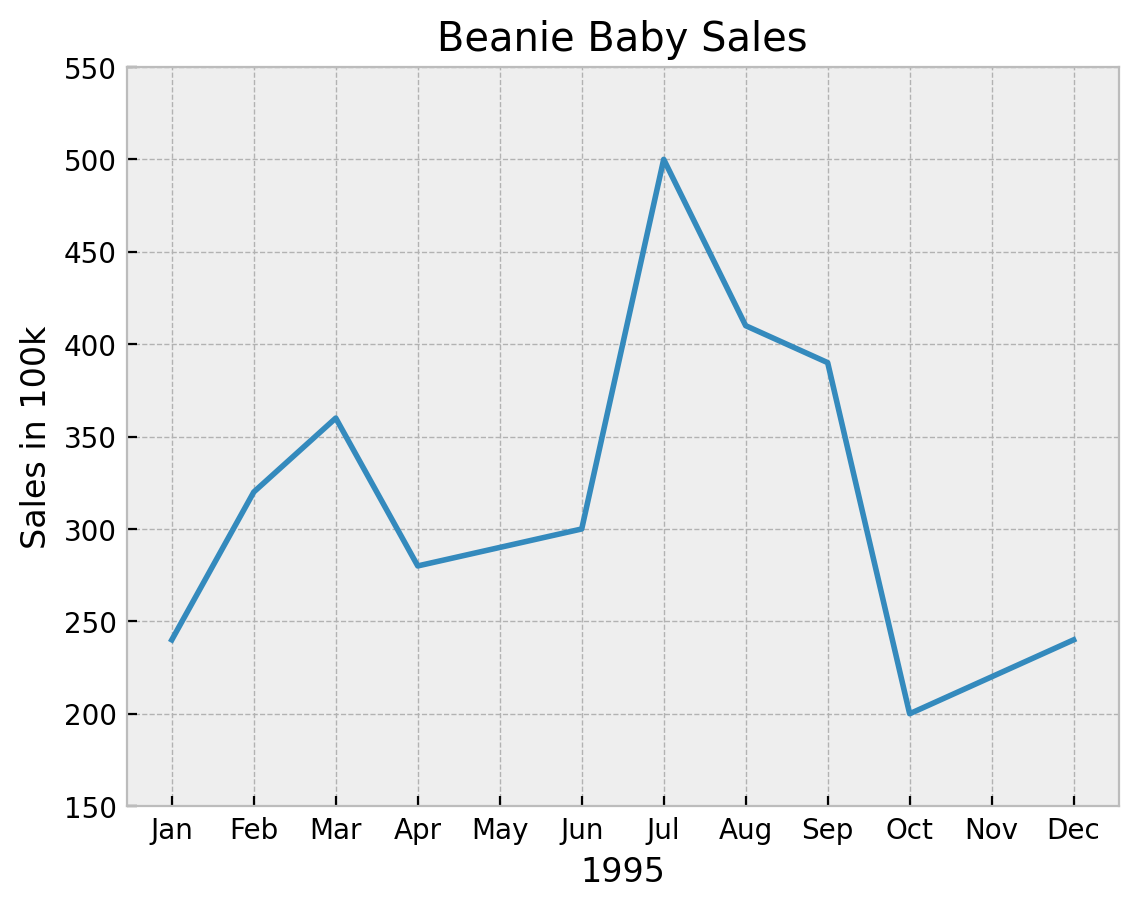

In [10]:
# Plot a better chart using this data

MaxY = max(badBar2Values)
MinY = min(badBar2Values)
botbuff = -50
topbuff = 50

plt.plot(badBar2Values)
plt.xticks(range(len(badBar2Names)),badBar2Names)
plt.title("Beanie Baby Sales")
plt.xlabel("1995")
plt.ylabel("Sales in 100k")
plt.ylim(MinY+botbuff, MaxY+topbuff)
plt.show()

Tell a story or describe a pattern using your new visualization.

<font color = blue>**Your Answer Here:**

Beanie Baby sales by month for the year 1995. You can see a spike in sales during July, a spike in sales. This is likely due to the release of an extremely rare Beanie Baby through a McDonald’s promo during the summer. Then comes October with a major drop off, an all time low, likely caused by many people starting to realize how worthless BB’s are. However, it appears that sales picked back up and the loyal followers kept throwing their money away. 


**To the grader: if you do not find how I have phrased my answers in this HW amusing, apologies. Know that I am taking this serious, just given the opportunity to write my own story for the data... why not make it fun. If this is a problem, I will give more sober answers for open ended responses in the future.**</font>

### Questionnaire

1) How long did you spend on this assignment?
<font color=red>Not certain, as I broke it up across multiple days. A few hours for sure, but no more than the five indicated it would take in the outline. It did not **feel** like the homework took an excessive amount of time. The first problem was the longest, but the first problem made all the other ones easy to accomplish. </font>
    
2) What did you like about it? What did you not like about it?   
<font color = red>I liked the step by step instructions in problem one. Not for the hand hold, but because it made it clear what you wanted. This also made me look deeper into the coding/choices than I might have on my own. (Not like) I wish the data was a little more varried, as the last problem could have been a different kind of chart. Unless I miscontrued that it should be a line plot... maybe it could have needed to be a histogram?</font>    

3) Did you find any errors or is there anything you would like changed?
<font color = red>Problem 3 had an error, the chart shows B=242, but the code says B=232. If the parts looking for feedback could be better highlighted or seperated that would help. This is a massive wall of text, and it felt like I could have easily missed one of your questions. I used the rubric to make sure I caught them all.</font>